# Sklearn Modeling Procedure
### Scikit-learn requries Python >=3.6
## Step 1: Data import 
### You can load the data from sklearn.datasets API. The dataset loader is for small and Toy dataset, while the dataset fetcher is for huge and Real World dataset. Here are the examples to load small data and fetch large data. 

In [1]:
from sklearn import datasets
iris = datasets.load_iris()  
faces = datasets.fetch_olivetti_faces()


### We can also have a function to download the data, this is to keep tack of the up-to-date data and allows for automation of dara fetching process. Below presented the code to fetch zip file from web and extract all .csv files to your working directory.

In [2]:
import os
from zipfile import ZipFile
import urllib

Root_Download = './master/..'
url_download = Root_Download +'Data.zip'
Data_Path = os.path.join ('Data')

def fetch_Data (url = url_download, Path =Data_Path):
    os.makedirs(Path, exist_ok=True)
    zip_path = os.path.join (Path, 'Dataset.zip')
    filepath, _ = urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(filepath, 'r') as zip:
        zip.extractall(Path)

#### Once we have dataset downloaded, let us write a function to load our data.

In [3]:
import pandas as pd 

def data_loader (data_path, data):
    csv_path = os.path.join (data_path, data)
    return pd.read_csv(csv_path)


#### Next I will walk you through preprocessing using one of our dataset, COVID_19.csv, and use head(10) to see the first 10 rows in the dataset. 

In [4]:
os.chdir('/Users/rachelzeng/full-stack-data-scientist/ch5_python')

import pandas as pd
Data_Path =os.path.join ('Data')
data_name = 'COVID_19_preprocess.csv'
COVID = data_loader (data_path=Data_Path, data= data_name)
COVID_copy = COVID.copy()
COVID.head(10)


,ID,Age,Sex,RS,Travel?,CC,DC,tmp,COVID?
0,1,44,M,Non-Canadian,True,True,False,37.464557,True
1,2,16,M,Non-Canadian,True,True,True,39.282884,True
2,3,36,M,Canadian,True,False,True,35.839426,False
3,4,53,F,Non-Canadian,False,True,True,38.117380,True
4,5,11,F,Canadian,False,False,True,36.933678,False
5,6,12,M,Non-Canadian,False,False,True,35.772355,False
6,7,18,F,Canadian,False,False,False,NaN,False
7,8,56,F,Non-Canadian,True,False,False,37.070684,True
8,9,7,M,Canadian,True,True,False,36.924761,True
9,10,16,M,Non-Canadian,True,False,False,37.445650,True


#### This is a small dataset features 200 rows and 9 columns, notice that it is a simulated data for better ilustrate, thus no real meaning apply to the result.

#### Suppose that this data is collected from COVID 19 Assessment Center, it listed 200 suspected patient waiting for testing.

#### Next, there are some useful methods that provide quick desription of the data. dataset.info() will show you number and name of the columns with associate data type.

#### You will find that this dataset contain 200 instances, 9 attributes.

In [5]:
print(COVID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
ID         200 non-null int64
Age        200 non-null int64
Sex        200 non-null object
RS         200 non-null object
Travel?    199 non-null object
CC         199 non-null object
DC         199 non-null object
tmp        199 non-null float64
COVID?     200 non-null bool
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 12.8+ KB
None


#### The describe() method is showing the summary of statistics of each attributes, such as mean, standard deviation, min, and max. Knowing them you will have a general idea of how does the distirbution of each attribute look like. Notice that when you use describe() method, it only return the summary of statistics for Age and Temperature attributes, it is becuase describe() only works for numerical data.

In [6]:
print(COVID.describe())

ID         Age         tmp
count  200.000000  200.000000  199.000000
mean   100.500000   42.085000   37.634978
std     57.879185   22.869694    1.315427
min      1.000000    4.000000   35.008780
25%     50.750000   22.000000   36.699820
50%    100.500000   42.500000   37.720827
75%    150.250000   62.250000   38.652300
max    200.000000   80.000000   39.878757


## Wait for a minute, so what Problem, exactly, are we solving here? For a given project, the very first step is actually to understand the purpose of the study and what is optimal result return to the user in assisting them to make decision?

### Suppose we are interested in predicting whether a suspected patient is infected with COVID 19. In order to make a robust model, we need to ensure our model can perform well on the new data. Assume we have a set of data, then this set should be divided into training and testing data, training data is what need to be fed into and testing data is what the model has not seen, and needed to be tested. We will talk more about it in Appendix for Machine Learning.



In [7]:
target_name = 'COVID?'
target = COVID.pop (target_name)
COVID.head()



,ID,Age,Sex,RS,Travel?,CC,DC,tmp
0,1,44,M,Non-Canadian,True,True,False,37.464557
1,2,16,M,Non-Canadian,True,True,True,39.282884
2,3,36,M,Canadian,True,False,True,35.839426
3,4,53,F,Non-Canadian,False,True,True,38.117380
4,5,11,F,Canadian,False,False,True,36.933678


In [8]:
from sklearn.model_selection import train_test_split

Train_Data, Test_Data, target_train, target_test = train_test_split(COVID, target, test_size=0.2, random_state =1)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 108 to 37
Data columns (total 8 columns):
ID         160 non-null int64
Age        160 non-null int64
Sex        160 non-null object
RS         160 non-null object
Travel?    159 non-null object
CC         159 non-null object
DC         159 non-null object
tmp        159 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ KB


### We simply use train_test_split function from Sklearn to do random spliting. test_size = 0.2 indicates the proportion of testing samples, ie. if we have 100 samples, then data set has 20 samples. random_state allows you to set random gnerator seed, ie. this will garurantee to get same result each time you run the experiment. (otherwise put 0 or nothing.) 

### Using the random smapling like the one above is fine if we have a large dataset, but since we are working with only 200 samples, we need to ensure that the samples selected for training data is representative of the whole. A better way is to conduct stratified sampling. 

### Stratify is a way to maintain the distirbution of pre-split classes. For example, suppose we have 100 suspected patients, 80 suspected patients are infected, 20 are not. If we need 75 training samples, in order to preserve the distribution, we must have 60 infected and 15 uninfected in the sample. (Similar to testing data) 

### Let us see how to do this using sklearn.

In [9]:
from sklearn.model_selection import train_test_split

Train_Data, Test_Data, target_train, target_test  = train_test_split(COVID,target,test_size=0.2, random_state=1,stratify=target)
Train_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 18 to 90
Data columns (total 8 columns):
ID         160 non-null int64
Age        160 non-null int64
Sex        160 non-null object
RS         160 non-null object
Travel?    159 non-null object
CC         159 non-null object
DC         159 non-null object
tmp        159 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ KB


## Deal with Missing Values
### The very first step is to clean our data, if we use the Sklearn datasets like Iris, Boston housing price etc., these datasets are high quality with no missing values. However, often time we need to deal with dirty data, it contain missing values, noise; Specially when we are dealing with clinical dataset, inaccurate data due to measurement error, and needs to deal with variety of data types and sources. Low quality of dara will cause us great trouble in the later stage.

In [10]:
from sklearn.impute import SimpleImputer
Null_col = COVID.columns[ COVID.isnull().any()]
COVID[Null_col].isnull().sum()

Travel?    1
CC         1
DC         1
tmp        1
dtype: int64

In [11]:
COVID.loc[pd.isnull(COVID).any(axis = 1),:].head()

,ID,Age,Sex,RS,Travel?,CC,DC,tmp
6,7,18,F,Canadian,False,False,False,NaN
100,101,56,F,Canadian,NaN,True,False,36.672816
103,104,39,F,Non-Canadian,False,NaN,False,37.135664
108,109,74,M,Canadian,True,True,NaN,36.683842


#### Here is a list of index of rows with missing values

In [12]:
Null_row = COVID.loc[pd.isnull(COVID).any(axis = 1),:].index.values # return index of rows with NaN in dataframe
print(Null_row) 

[  6 100 103 108]


### There are severeal ways to deal with missing values. The simplest way is to remove the entire sample or variable from the data depending how many missing values in a sample or a variable(attribute). If it contians more than a certian percentage of missing value, then delete the missing entries or the entire column. In our case, we do not have too much missing value for the attribues, so we can delete the missing entries. 

####  However, discard entire rows and/or columns may comes at the expense of potentially valuable data, and left with fewer samples. A better way to deal with numerical attribute, like Temperature, is by inferring them from the data. \textit{Sklearn.SimpleImputer} provides strategies to estimate the missing values, such as fill the NaN with mean, medium or most frequent of the column where missing value is located.

In [13]:
COVID['tmp']=COVID['tmp'].apply(pd.to_numeric, errors='coerce')

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer

Mean_imp = SimpleImputer(missing_values= np.nan, strategy = 'mean')
COVID['tmp'] = Mean_imp.fit_transform (COVID['tmp'].values.reshape(-1,1)) 
# .reshape(1,-1) indicate transform to array with 1 row, and do not care about how many column. 
COVID[COVID['tmp'].isnull()] 


,ID,Age,Sex,RS,Travel?,CC,DC,tmp


#### We replece NaN values in Temperature with the mean, and drop rows which contain missing values.


In [15]:
row_null = COVID.loc[pd.isnull(COVID).any(axis = 1),:].index.values
COVID = COVID.drop(row_null)
COVID

,ID,Age,Sex,RS,Travel?,CC,DC,tmp
0,1,44,M,Non-Canadian,True,True,False,37.464557
1,2,16,M,Non-Canadian,True,True,True,39.282884
2,3,36,M,Canadian,True,False,True,35.839426
3,4,53,F,Non-Canadian,False,True,True,38.117380
4,5,11,F,Canadian,False,False,True,36.933678
...,...,...,...,...,...,...,...,...
195,196,51,F,Non-Canadian,True,True,True,37.905418
196,197,39,M,Canadian,False,False,False,35.301528
197,198,68,M,Canadian,False,False,False,38.035950
198,199,75,F,Non-Canadian,True,True,False,39.422919


In [16]:
COVID[['Travel?', 'CC', 'DC']] = COVID[['Travel?', 'CC', 'DC']].astype('bool')
COVID[['RS',  'Sex']] = COVID[['RS', 'Sex']].astype('category')
Bool_attribute = list(list(COVID.select_dtypes(include=['bool']).columns))
Num_attribute = list(COVID.select_dtypes(include=['number']).columns)
Cat_attribute = list(COVID.select_dtypes(include=['category']).columns)
Bool_attribute, Num_attribute,Cat_attribute

(['Travel?', 'CC', 'DC'], ['ID', 'Age', 'tmp'], ['Sex', 'RS'])

### In order to run numerical analyses, we will need to convert values from categorical to numerical by assigning muerical codes to them. As we can see column: Residency Status, and Sex are categorical data type . The column: Travel? Close contact, Dry Vough and COVID_19? are boolean, which means it only returns True or False. 

### There are two ways to encode numerical data to numbers, LabelEncoder() or OneHotEncoder(). So what are the differences? 

##  LabelEncoder() vs. OneHotEncoder()


In [17]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
label_encoded = label_enc.fit_transform(COVID['RS'])
label_encoded


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2,
       1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 1, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 3, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2])

In [18]:
# generate random integer values
from random import seed
from random import sample
import random
seed(1)
Status = ['Canadian','Non-Canadain', 'Permanent Resident','Refugee']
Random_residency = random.choices(Status, k=197)
print(Random_residency[:8])

['Canadian', 'Refugee', 'Refugee', 'Non-Canadain', 'Non-Canadain', 'Non-Canadain', 'Permanent Resident', 'Refugee']


In [19]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_encoded_res = label_enc.fit_transform(Random_residency)
label_encoded_res[:8]

array([0, 3, 3, 1, 1, 1, 2, 3])

In [20]:
### Suppose we lable encode the Residency Status, we will get the result as seen above.  As you can see 0 = Canadian, 1 = Non-Canadian, 2 = Permanent Resident, 3 = Refugee. However, this is problematic because the model will misunderstand the data to be numerical order, like $0<1<2<3$. For example, it is not the case that as Residency Status number increase, their age increase. In fact, what we actually want is to use numerical values to replace unrelated categorical data. That is why OneHot Encoder is used. OneHot Encoder on the other hand will first splits the column into multiple columns with distinct Residency Status, and depends on which column has what value, it will replace with 0 or 1. To see this:

In [21]:
import scipy
from sklearn.preprocessing import OneHotEncoder
OH_enc = OneHotEncoder()
Resi_col = pd.DataFrame(Random_residency)
Resi_encoded = OH_enc.fit_transform(Resi_col).toarray()
print(Resi_encoded[:8])

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
# Method 2：Using Sklearn Preprocessing
Resident_cat = COVID[['RS']]
Resident_cat.head(4)

,RS
0,Non-Canadian
1,Non-Canadian
2,Canadian
3,Non-Canadian


In [23]:
from sklearn.preprocessing import OneHotEncoder
OH_enc = OneHotEncoder()
label = [['Canadian' , 1], ['Non-Canadian',2], ['Permanent Resident', 3], ['Refugee',4]]
OH_enc.fit(label)
OH_enc.categories_

[array(['Canadian', 'Non-Canadian', 'Permanent Resident', 'Refugee'],
       dtype=object),
 array([1, 2, 3, 4], dtype=object)]

In [24]:
Residency_encoded = OH_enc.fit_transform(Resident_cat)
Residency_encoded

<197x4 sparse matrix of type '<class 'numpy.float64'>'
	with 197 stored elements in Compressed Sparse Row format>

In [25]:
Residency_encoded.toarray()

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [26]:
null_train = Train_Data.loc[pd.isnull(Train_Data).any(axis = 1),:].index.values
Train_Data = Train_Data.drop(null_train)
null_test = Test_Data.loc[pd.isnull(Test_Data).any(axis = 1),:].index.values
Test_Data = Test_Data.drop(null_test)


target_train= target_train.drop(null_train)
target_test = target_test.drop(null_test)

# Transformation Pipeline
### A very useful technique in Sklearn is the Pipeline class. In general, Pipeline groups a set of activates together to a perform task, this can manage and fixed the sequence of all steps, in which makes it easy to reuse parameter sets on new data. In the data prepossessing, let us build a pipeline with sequences of "fit and transform", to deal with each distinct data type.

## Custom Transformer
### The additional flexibility provided to data preprocessing from the \textit{FunctionTransromer} function, this allows you to build you own transformers to clean and organize the data. You should know by now that we have been constantly using \textit{fit()}, \textit{transform()} or \textit{fittransform()}, this is the basic usage of most of Sklearn functions. Later, you will get to know other features, such as in regression has \textit{coef} that store the regression coefficients and \textit{intercept\_} is to store intercept.

### Similarly, building a custom transformer also need to consist \textit{fit()} and \textit{transform()}, let us build a pipeline for our target\_train and target\_test data processing, such pipeline includes two simple transformer classes that drop the rows where at least one element is missing and convert Boolean values into either 0 or 1.

In [27]:
from sklearn.pipeline import Pipeline
class drop_na(object):
    def __init__(self,attribute_name=True):
        self.attribute_name = attribute_name
  
    def transform(self, X):
        X_cp = X.copy()
        #null = np.argwhere(np.isnan(X.cp))
        X_cp = X_cp[~np.isnan(X_cp).any(axis=1)]
        return X_cp 
     
    def fit (self, X_cp, y=None):
        return self

class target_encode(object):
    def __init__(self, attribute_name=True):
        self.attribute_name = attribute_name
  
    def transform(self, X):
        X_cp = X.copy()
        X_cp = np.where (X_cp == True, 1, X_cp)
        return X_cp
    def fit (self, X_cp, y=None):
        return self

cat_pip = Pipeline([
    ('imputer_na', drop_na()), # Handle missing data 
    ('imputer_Bool', target_encode()),
])

target_train = cat_pip.transform(np.asarray(target_train).reshape(1,-1))
target_test = cat_pip.transform(np.asarray(target_test).reshape(1,-1))
target_train = target_train[0]
target_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

In [28]:
target_train[:8]

array([0, 1, 1, 0, 1, 1, 1, 0])

## A quick comment on three common data preprocessing tools: 
### StandardScaler: The data transofrmed into a standard normal distribution with a mean of 0 and a variance of 1 (Z-score).
### RobustScaler: Similar to StandardScaler. Instead of using mean and variance, it uses the median and quartile. Therefore, this will get rid of the outliers directly.
### MinMaxScaler: Simple method to shift and scale the data so that the values returned within the range of 0 and 1, we can do this by subract the min value and divide by the the difference between max and min values.
### Normalizer: It will first convert the samples into Euclidean distance of 1, the data distribution thus turn into a circle with a radius of 1. It is used when we are interested in only the distance and direction of the data not the value itself.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # helps perform different transformations for di
from sklearn.preprocessing import StandardScaler

numerical_pip = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy= 'mean')), # Handle missing data 
    ('std_scaler', StandardScaler()),
])



In [30]:
Bool_attribute, Num_attribute,Cat_attribute


(['Travel?', 'CC', 'DC'], ['ID', 'Age', 'tmp'], ['Sex', 'RS'])

In [31]:
cat = Bool_attribute + Cat_attribute
Full_pip = ColumnTransformer([
    ('num_age_temp' , numerical_pip, Num_attribute),
    ('cat_Bool', OneHotEncoder(), cat)
])

Trained_transformed = Full_pip.fit_transform(Train_Data)
Tested_transformed = Full_pip.fit_transform(Test_Data)
Trained_transformed

array([[-1.47893671, -0.47426715,  0.99996833, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.70919033,  1.42961319,  1.32933101, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.00885591,  0.45553488, -0.00245309, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.27453316, -1.18268774, -1.64452875, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49664852, -1.35979289,  1.27059076, ...,  0.        ,
         0.        ,  0.        ],
       [-0.20368589,  0.45553488, -1.29768869, ...,  1.        ,
         0.        ,  0.        ]])

### In addition, pipeline can be also used to chain classification estimator, but do keep in mind that estimator should comes after all the transfromers.
###  Pipline vs. featureUnion: featureUnion is another way to chian transformer objects into one, different from Pipeline, the transformers are applied in parallel while Pipeline execute the transformers in order.

# Modeling

### Finally, enough for the suffer. Here comes the most exicting part, let us build a model to predict whether a suspected patient is infected with COVID 19. Sklearn provides packages for supervised(labeled target) and unsupervised learning(unlabeled target),  these models are called "Estimator" which is used to do prediction or regression. In general the estimators will also have the following functions: 
### 1. fit() : fed in attribute data and target to train the model, other parameters like batch size, learning rate etc. On the other hand, fit() in preprcoessing can be used to caculates mean and variance, and accept data trasnformation method. 
### 2. predict() : used for data prediction, fed in the input data and it wll return a prediction labels in numpy array. We usually feed the testing set into predict() and then compare with the true test labels.
### 3. score() : used to calculate the accuracy of the model, thus it range between 0 and 1. Notice that this is the most basic indicator to evaluate the performance of the model, there are other indicators such as recall rate or precision rate. Under certain circumstances, having one indicator is not enough to judge whether a model is a good model.

## fit() and predict() with LogisticRegression.
### We also import classification_report, this will return a more comprehensive report of classification.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classification = LogisticRegression(solver = 'lbfgs' , multi_class= 'multinomial')
classification.fit(Trained_transformed, target_train)
predict = classification.predict(Tested_transformed)
print(classification_report(target_test[0], predict))
print(accuracy_score(target_test[0], predict))

precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.67      0.67      0.67        21

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40

0.65


## Use joblib to save our model

### Note: it will save directly to your current working directory. 

In [47]:
os.chdir('../Saved_models')

In [48]:
import joblib
joblib.dump (classification, 'sk_classification.pkl')

['sk_classification.pkl']

In [49]:
Reuse_clf = joblib.load ( 'sk_classification.pkl' )

In [50]:
score = Reuse_clf.score(Tested_transformed,target_test[0])
print("The test score is {0:.2f} %".format(100 * score))

The test score is 65.00 %


### Not suprisingly, using Logistic Regression with all attribute columns resulted in poor rate of predictive score. We will revisit this problem in Machine Learning section with additional knowledge on the subject of classification and random sampling, such as feature selections, bootstraping and implement random forest classifier to improve the prediction accuracy.

In [51]:
col_name = ['Age','Temperature','Travel Y', 'Travel N', 'Close contact Y', 'Close contact N', 'Residency Status- Permanent ', 'Residency Status-NC ','Residency Status- C','Residency Status- R','Education level-U','Education level-H','Education level-E',  'Dry Cough Y','Dry Cough- N', 'Sex-M', 'Sex-F']

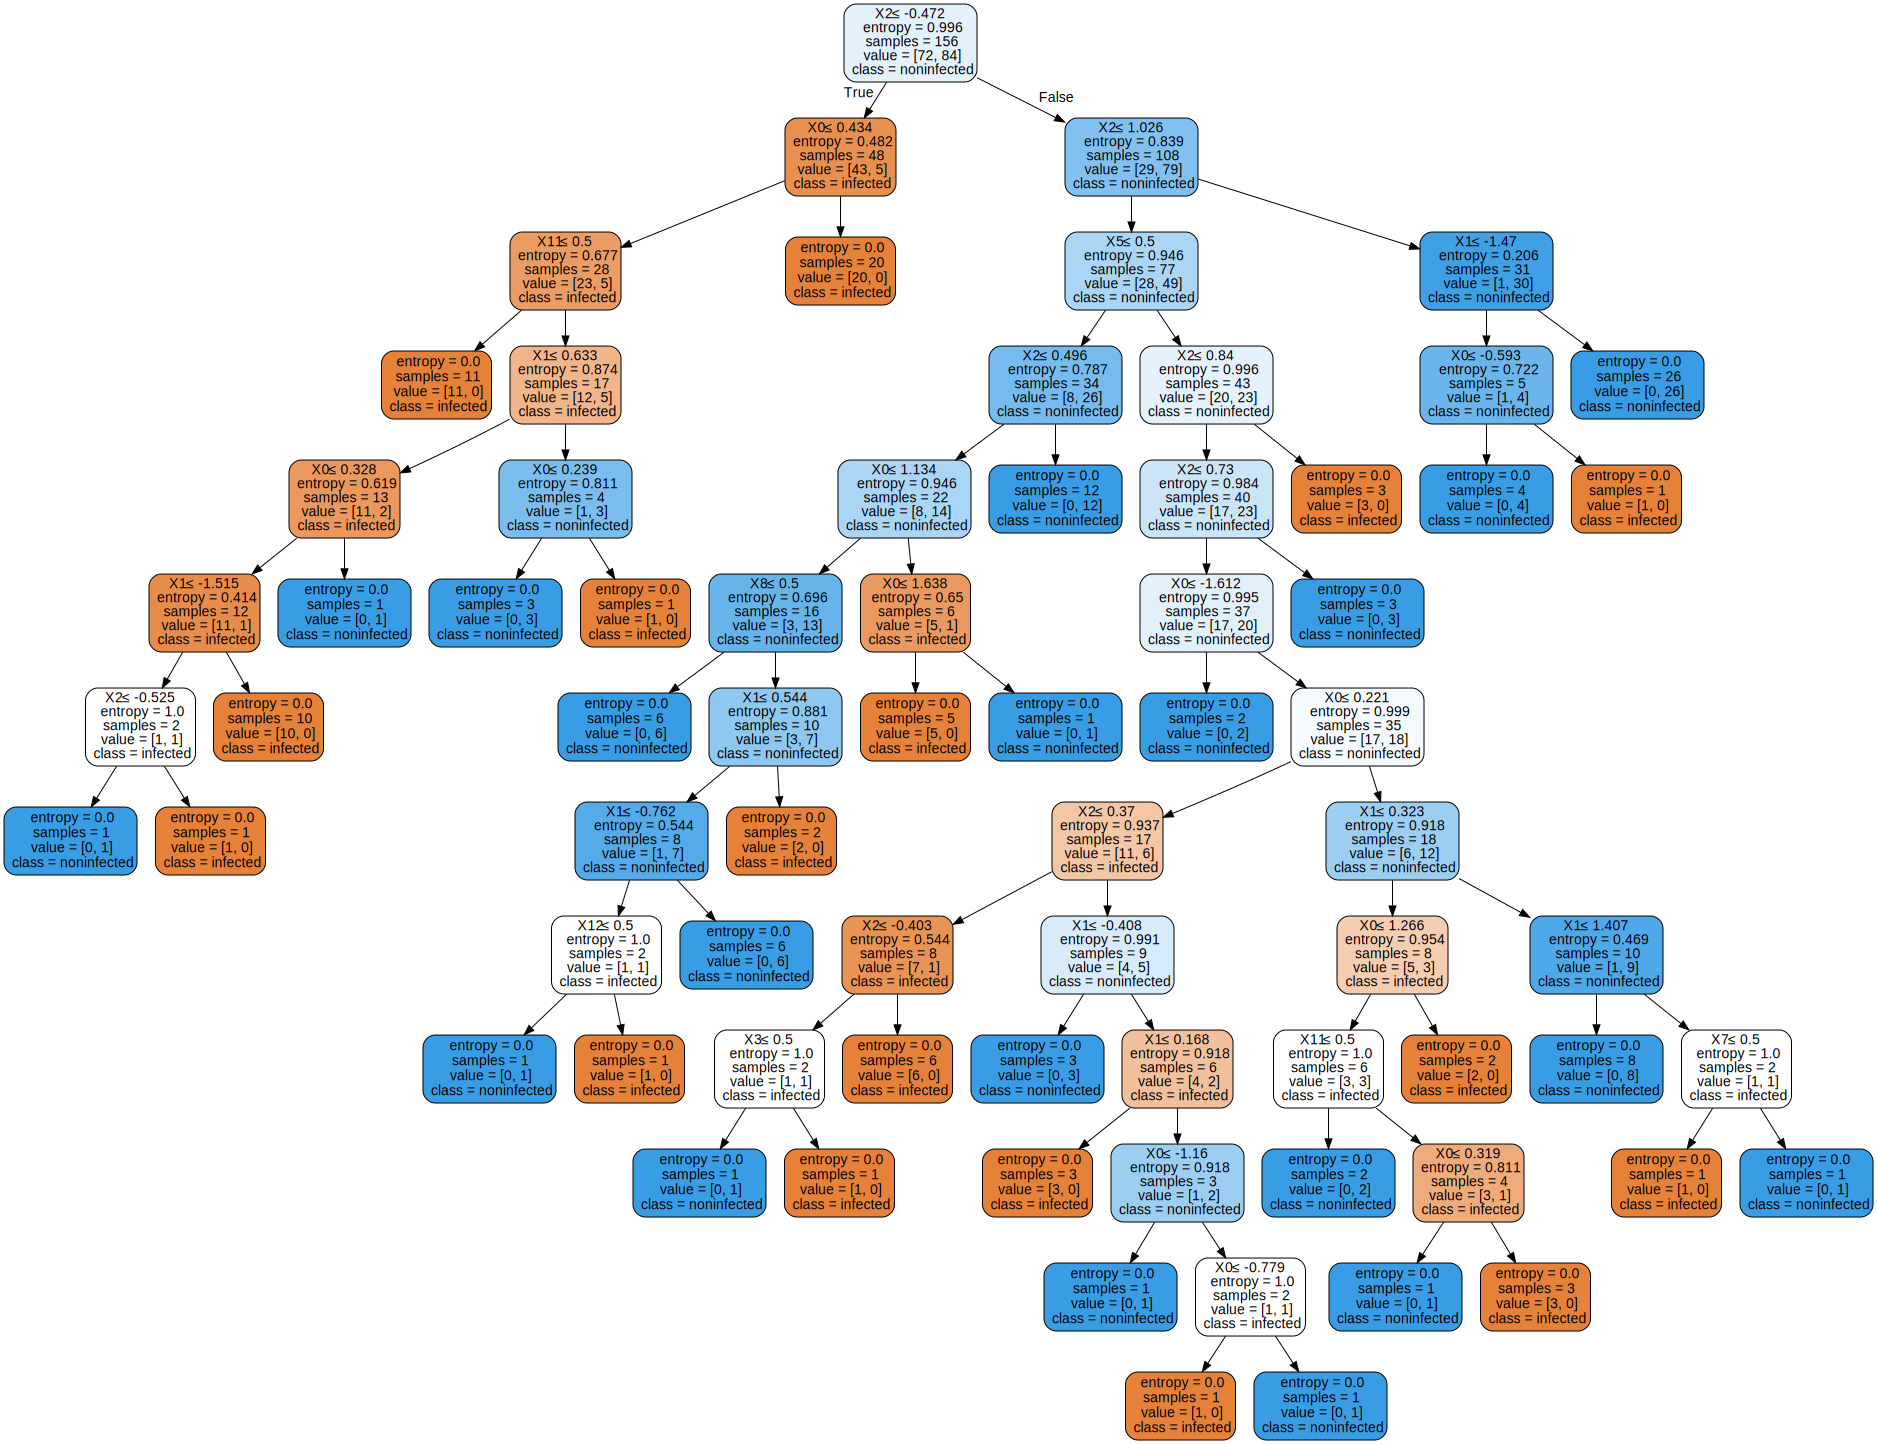

In [53]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(Trained_transformed, target_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render("COVID 19 Prediction") 
graph

In [40]:
print(*zip(col_name ,clf.feature_importances_))

('Age', 0.22839148128048756) ('Temperature', 0.1871873799236041) ('Travel Y', 0.44834230811263454) ('Travel N', 0.0) ('Close contact Y', 0.025751048228445064) ('Close contact N', 0.020630722405606136) ('Residency Status- Permanent ', 0.0) ('Residency Status-NC ', 0.0) ('Residency Status- C', 0.027852894941643797) ('Residency Status- R', 0.0) ('Education level-U', 0.017735310233038006) ('Education level-H', 0.044108854874540755) ('Education level-E', 0.0) ('Dry Cough Y', 0.0) ('Dry Cough- N', 0.0)


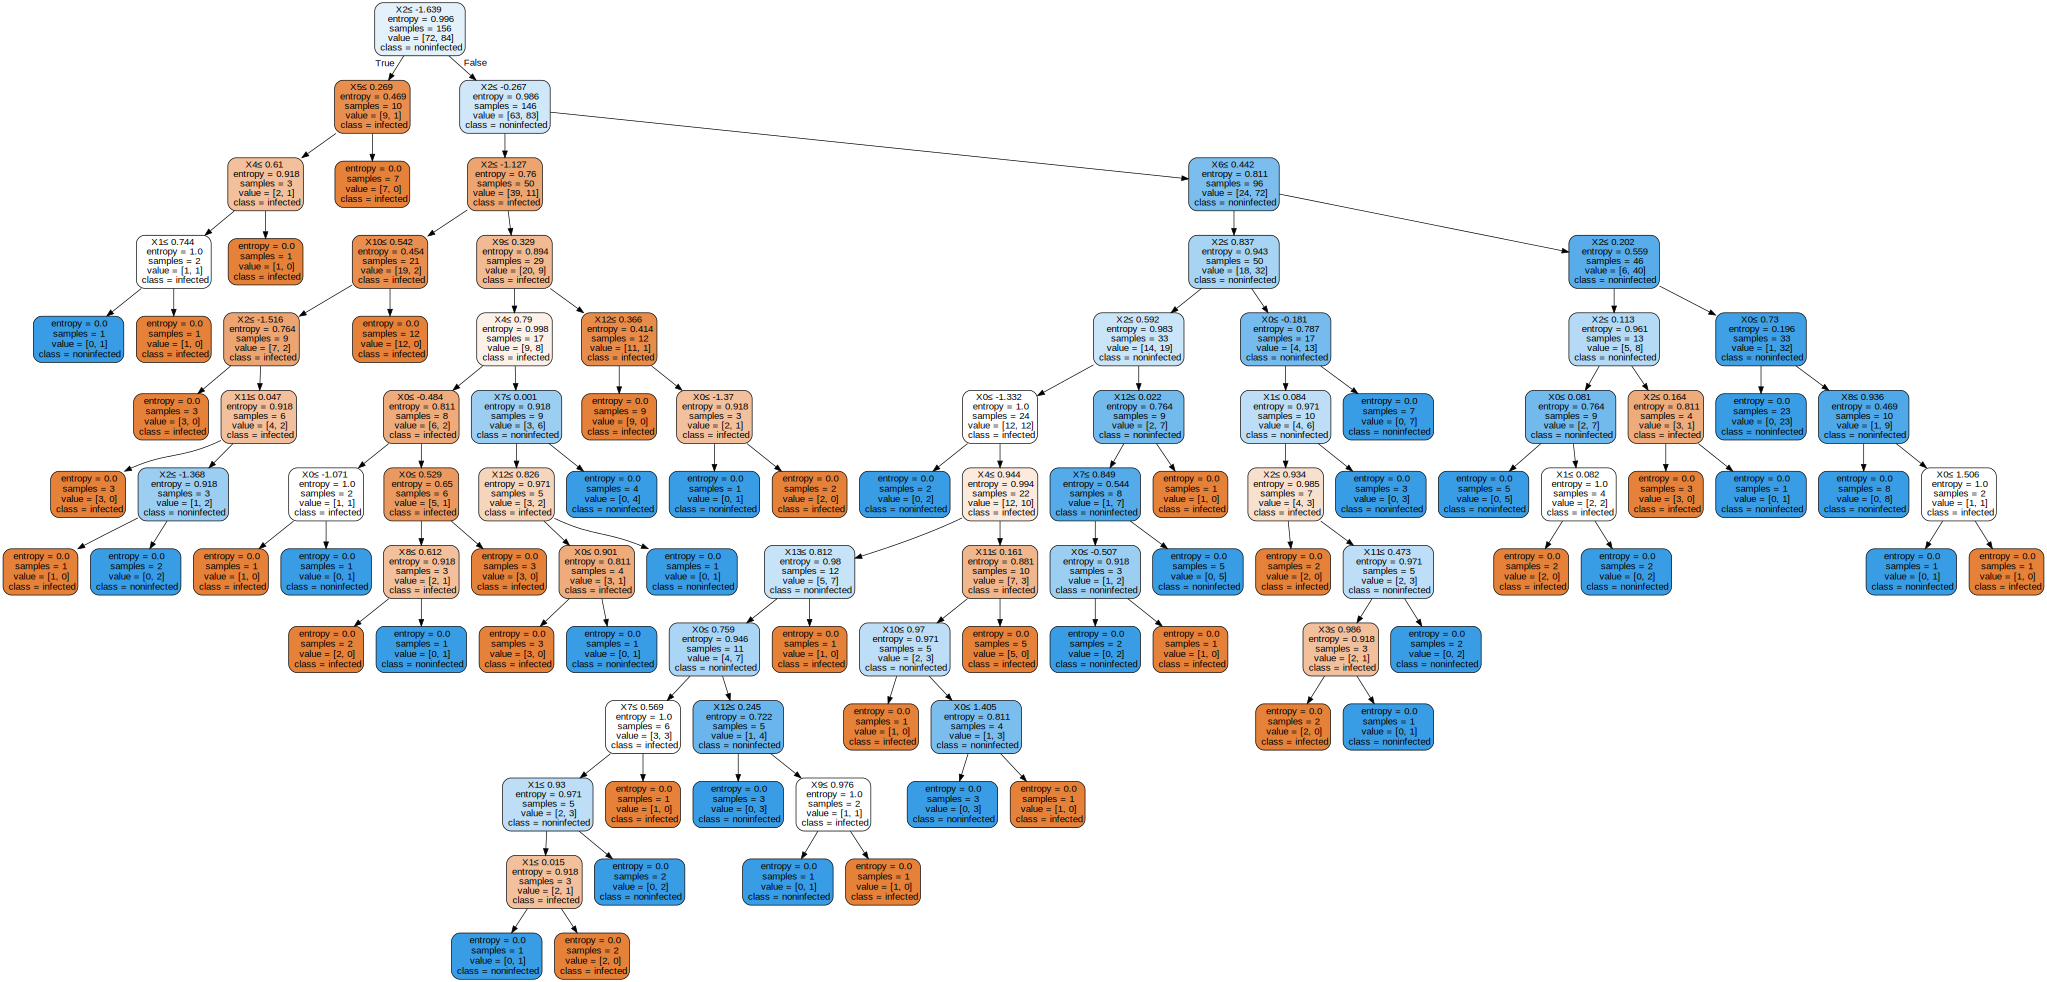

In [57]:
import graphviz
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random')
clf2.fit(Trained_transformed, target_train)
dot_data = tree.export_graphviz(clf2, out_file=None, 
                     #feature_names=col_name, 
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data)  
graph.format = 'png'
graph2.render("COVID 19 Prediction_random") 
graph2